<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Zero_Weights_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [31]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

<Axes: >

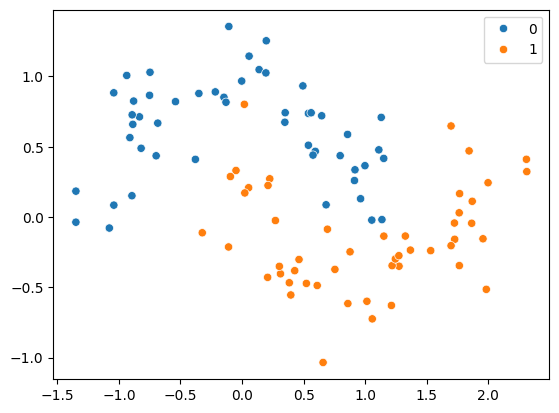

In [32]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "Sigmoid":

In [33]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [37]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, verbose=1,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8844 - loss: 0.6401 - val_accuracy: 0.6500 - val_loss: 0.6603
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8492 - loss: 0.6401 - val_accuracy: 0.6500 - val_loss: 0.6602
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8430 - loss: 0.6412 - val_accuracy: 0.6500 - val_loss: 0.6592
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8508 - loss: 0.6387 - val_accuracy: 0.6500 - val_loss: 0.6586
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8820 - loss: 0.6322 - val_accuracy: 0.6500 - val_loss: 0.6581
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8195 - loss: 0.6360 - val_accuracy: 0.6500 - val_loss: 0.6575
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8430 - loss: 0.6339 - val_accuracy: 0.6500 - val_loss: 0.6570
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8313 - loss: 0.6344 - val_accuracy: 0.6500 - 

# Setting base parameters to 0:

In [46]:
model.get_weights()

[array([[ 0.06470225,  0.06470225,  0.06470225,  0.06470225,  0.06470225,
          0.06470225,  0.06470225,  0.06470225,  0.06470225,  0.06470225],
        [-0.06443409, -0.06443409, -0.06443409, -0.06443409, -0.06443409,
         -0.06443409, -0.06443409, -0.06443409, -0.06443409, -0.06443409]],
       dtype=float32),
 array([0.01177534, 0.01177534, 0.01177534, 0.01177534, 0.01177534,
        0.01177534, 0.01177534, 0.01177534, 0.01177534, 0.01177534],
       dtype=float32),
 array([[0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812],
        [0.02040812]], dtype=float32),
 array([0.01773337], dtype=float32)]

In [47]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [48]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

# Now let's create a model for these Weights:

# Activation Function as Sigmoid:

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = model.fit(X, y, validation_split=0.2, epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.4742 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6955
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.3500 - val_loss: 0.6962
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5773 - loss: 0.6917 - val_accuracy: 0.3500 - val_loss: 0.6976
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5344 - loss: 0.6922 - val_accuracy: 0.3500 - val_loss: 0.6984
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5344 - loss: 0.6920 - val_accuracy: 0.3500 - val_loss: 0.6994
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5031 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.7003
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5656 - loss: 0.6902 - val_accuracy: 0.3500 - val_loss: 0.7016
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5461 - loss: 0.6908 - val_accuracy: 0.3500 - 

# Observing the model Data:

In [51]:
model.get_weights()

[array([[ 0.07315427,  0.07315427,  0.07315427,  0.07315427,  0.07315427,
          0.07315427,  0.07315427,  0.07315427,  0.07315427,  0.07315427],
        [-0.07285538, -0.07285538, -0.07285538, -0.07285538, -0.07285538,
         -0.07285538, -0.07285538, -0.07285538, -0.07285538, -0.07285538]],
       dtype=float32),
 array([0.0172936, 0.0172936, 0.0172936, 0.0172936, 0.0172936, 0.0172936,
        0.0172936, 0.0172936, 0.0172936, 0.0172936], dtype=float32),
 array([[0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291],
        [0.02200291]], dtype=float32),
 array([0.0185132], dtype=float32)]

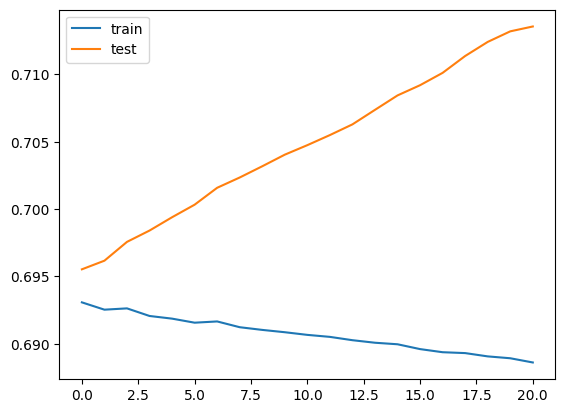

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 948us/step


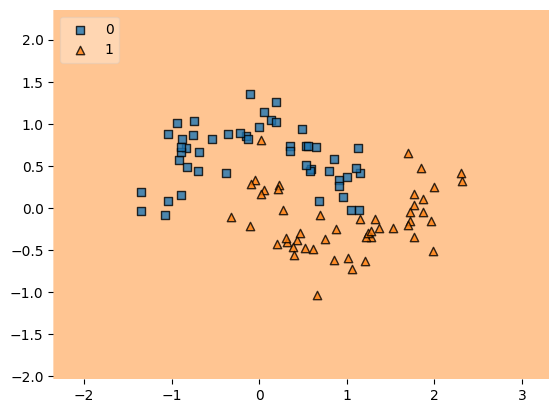

In [54]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()